In [1]:
# 기본
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from matplotlib import font_manager, rc
import platform
from tqdm import tqdm
import sklearn
from sklearn import linear_model
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from sklearn.model_selection import train_test_split

# crawling
import requests
import lxml.html
import sqlite3
from pandas.io import sql
from bs4 import BeautifulSoup

# 한글 폰트 설정
if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

In [2]:
t = pd.read_csv('국건영_회귀분석용.csv', encoding = 'euc-kr', low_memory = False)

In [3]:
t

,year,ID,sex,age,psu,HE_ht,HE_wt,HE_BMI,HE_sbp_tr,HE_dbp_tr,...,DW_WBT_BMC,DW_SBT_BMD,DW_WBT_BMD,DW_Trk_FT,DW_Trk_MS,DW_SBT_FT,DW_WBT_FT,DX_F_Ts_A,DX_S_Ts_A,DX_FN_Ts_A
0,2008.0,b'A448440901',1.0,70.0,b'A448',155.2,58.0,24.079339,122.3,71.3,...,2113.500475,0.994057,1.119189,5350.559358,28165.253024,9588.845972,10554.355505,-0.893139,-0.537667,-1.857823
1,2008.0,b'A448440902',2.0,68.0,b'A448',165.6,63.4,23.118976,128.7,82.7,...,1616.637082,0.744743,0.851513,11248.239290,30770.948113,21544.371816,22368.168979,-1.420957,-1.534783,-2.336729
2,2008.0,b'A448680102',2.0,48.0,b'A448',152.3,59.3,25.565535,133.7,90.7,...,2274.388678,0.959672,1.237565,12183.372700,28925.836734,22269.339707,23114.327698,1.050435,1.171826,-0.459346
3,2008.0,b'A448680501',2.0,35.0,b'A448',162.5,53.4,20.222485,104.7,70.7,...,2292.951162,1.002821,1.182751,6573.697606,25808.635531,11724.950815,12571.863454,0.961565,0.354087,-0.260561
4,2008.0,b'A448740903',2.0,70.0,b'A448',155.7,63.9,26.358679,111.7,83.7,...,1455.752755,0.772691,0.882857,13489.507467,32492.389825,23471.432798,24379.078925,-1.764957,-3.223913,-2.883364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19496,2011.0,b'O359840901',2.0,60.0,b'O359',154.9,52.2,21.755430,NaN,NaN,...,1602.291088,0.785240,0.902542,9391.419342,25933.167250,16812.840990,17517.341590,-0.790261,-1.645652,-2.023738
19497,2011.0,b'O359859801',1.0,68.0,b'O359',165.2,68.2,24.989887,NaN,NaN,...,2062.206293,0.872690,0.953034,7434.439160,34377.940540,11891.414170,12845.828470,-0.588686,-3.072583,-1.048065
19498,2011.0,b'O359859802',2.0,61.0,b'O359',160.1,67.2,26.217218,NaN,NaN,...,2177.872021,0.889561,1.083464,13564.637920,34958.357520,24210.578840,24950.322420,-0.315391,-1.170348,-0.949065
19499,2011.0,b'O359920901',1.0,65.0,b'O359',178.2,70.5,22.201060,NaN,NaN,...,2691.954983,1.028622,1.176135,9776.974162,36100.385010,15916.002950,16825.741910,-1.368321,-1.755417,-1.595887


In [7]:
for col in t.columns: 
    print(col, t[col].isnull().sum())

year 0
ID 0
sex 0
age 0
psu 0
HE_ht 23
HE_wt 24
HE_BMI 31
HE_sbp_tr 2442
HE_dbp_tr 2442
HE_obe 187
HE_Upro 1579
HE_HbA1c 15649
HE_glu 860
HE_chol 818
HE_ast 818
HE_alt 818
HE_tb 494
HE_HP_tr 2669
DI3_lt 90
DI4_lt 184
HE_DM 1562
HE_wc 88
HE_HDL_st2 818
HE_LDL_drct 14813
HE_crea 821
D_1_1 90
L_BR1 4505
L_LN1 4505
L_DN1 4505
N_NA 2328
F_BEEF 4857
F_CHICK 4857
F_PORK 4857
BS3_1 98
BS3_2 98
BD1_11 98
BD2_1 98
BE3_21 98
BE3_22 98
BP1 98
DI3_dg 90
DI4_dg 184
DI1_dg 90
DE1_dg 90
DI2_dg 90
DI3_pt 90
DI4_pt 184
DI1_pt 90
DE1_pt 90
DI2_pt 90
HE_hepaB 818
BS6_2_2 98
BS6_3 98
BS2_1 98
pa_high 321
pa_mid 326
pa_walk 336
DJ1_dg 8597
DJ1_pt 8597
HW_MS 13800
DW_WBT_BMC 547
DW_SBT_BMD 547
DW_WBT_BMD 547
DW_Trk_FT 427
DW_Trk_MS 427
DW_SBT_FT 427
DW_WBT_FT 427
DX_F_Ts_A 358
DX_S_Ts_A 923
DX_FN_Ts_A 570


In [9]:
# 10000개 이상인 열 drop

t.drop(['HE_HbA1c', 'HE_LDL_drct', 'HW_MS'], axis = 1, inplace = True)
t

,year,ID,sex,age,psu,HE_ht,HE_wt,HE_BMI,HE_sbp_tr,HE_dbp_tr,...,DW_WBT_BMC,DW_SBT_BMD,DW_WBT_BMD,DW_Trk_FT,DW_Trk_MS,DW_SBT_FT,DW_WBT_FT,DX_F_Ts_A,DX_S_Ts_A,DX_FN_Ts_A
0,2008.0,b'A448440901',1.0,70.0,b'A448',155.2,58.0,24.079339,122.3,71.3,...,2113.500475,0.994057,1.119189,5350.559358,28165.253024,9588.845972,10554.355505,-0.893139,-0.537667,-1.857823
1,2008.0,b'A448440902',2.0,68.0,b'A448',165.6,63.4,23.118976,128.7,82.7,...,1616.637082,0.744743,0.851513,11248.239290,30770.948113,21544.371816,22368.168979,-1.420957,-1.534783,-2.336729
2,2008.0,b'A448680102',2.0,48.0,b'A448',152.3,59.3,25.565535,133.7,90.7,...,2274.388678,0.959672,1.237565,12183.372700,28925.836734,22269.339707,23114.327698,1.050435,1.171826,-0.459346
3,2008.0,b'A448680501',2.0,35.0,b'A448',162.5,53.4,20.222485,104.7,70.7,...,2292.951162,1.002821,1.182751,6573.697606,25808.635531,11724.950815,12571.863454,0.961565,0.354087,-0.260561
4,2008.0,b'A448740903',2.0,70.0,b'A448',155.7,63.9,26.358679,111.7,83.7,...,1455.752755,0.772691,0.882857,13489.507467,32492.389825,23471.432798,24379.078925,-1.764957,-3.223913,-2.883364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19496,2011.0,b'O359840901',2.0,60.0,b'O359',154.9,52.2,21.755430,NaN,NaN,...,1602.291088,0.785240,0.902542,9391.419342,25933.167250,16812.840990,17517.341590,-0.790261,-1.645652,-2.023738
19497,2011.0,b'O359859801',1.0,68.0,b'O359',165.2,68.2,24.989887,NaN,NaN,...,2062.206293,0.872690,0.953034,7434.439160,34377.940540,11891.414170,12845.828470,-0.588686,-3.072583,-1.048065
19498,2011.0,b'O359859802',2.0,61.0,b'O359',160.1,67.2,26.217218,NaN,NaN,...,2177.872021,0.889561,1.083464,13564.637920,34958.357520,24210.578840,24950.322420,-0.315391,-1.170348,-0.949065
19499,2011.0,b'O359920901',1.0,65.0,b'O359',178.2,70.5,22.201060,NaN,NaN,...,2691.954983,1.028622,1.176135,9776.974162,36100.385010,15916.002950,16825.741910,-1.368321,-1.755417,-1.595887


In [11]:
# DJ1_dg 폐결핵 진단여부
# DJ1_pt 폐결핵 치료여부 
# 각각 null 8500개라 drop

t.drop(['DJ1_dg', 'DJ1_pt'], axis = 1, inplace = True)
t

,year,ID,sex,age,psu,HE_ht,HE_wt,HE_BMI,HE_sbp_tr,HE_dbp_tr,...,DW_WBT_BMC,DW_SBT_BMD,DW_WBT_BMD,DW_Trk_FT,DW_Trk_MS,DW_SBT_FT,DW_WBT_FT,DX_F_Ts_A,DX_S_Ts_A,DX_FN_Ts_A
0,2008.0,b'A448440901',1.0,70.0,b'A448',155.2,58.0,24.079339,122.3,71.3,...,2113.500475,0.994057,1.119189,5350.559358,28165.253024,9588.845972,10554.355505,-0.893139,-0.537667,-1.857823
1,2008.0,b'A448440902',2.0,68.0,b'A448',165.6,63.4,23.118976,128.7,82.7,...,1616.637082,0.744743,0.851513,11248.239290,30770.948113,21544.371816,22368.168979,-1.420957,-1.534783,-2.336729
2,2008.0,b'A448680102',2.0,48.0,b'A448',152.3,59.3,25.565535,133.7,90.7,...,2274.388678,0.959672,1.237565,12183.372700,28925.836734,22269.339707,23114.327698,1.050435,1.171826,-0.459346
3,2008.0,b'A448680501',2.0,35.0,b'A448',162.5,53.4,20.222485,104.7,70.7,...,2292.951162,1.002821,1.182751,6573.697606,25808.635531,11724.950815,12571.863454,0.961565,0.354087,-0.260561
4,2008.0,b'A448740903',2.0,70.0,b'A448',155.7,63.9,26.358679,111.7,83.7,...,1455.752755,0.772691,0.882857,13489.507467,32492.389825,23471.432798,24379.078925,-1.764957,-3.223913,-2.883364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19496,2011.0,b'O359840901',2.0,60.0,b'O359',154.9,52.2,21.755430,NaN,NaN,...,1602.291088,0.785240,0.902542,9391.419342,25933.167250,16812.840990,17517.341590,-0.790261,-1.645652,-2.023738
19497,2011.0,b'O359859801',1.0,68.0,b'O359',165.2,68.2,24.989887,NaN,NaN,...,2062.206293,0.872690,0.953034,7434.439160,34377.940540,11891.414170,12845.828470,-0.588686,-3.072583,-1.048065
19498,2011.0,b'O359859802',2.0,61.0,b'O359',160.1,67.2,26.217218,NaN,NaN,...,2177.872021,0.889561,1.083464,13564.637920,34958.357520,24210.578840,24950.322420,-0.315391,-1.170348,-0.949065
19499,2011.0,b'O359920901',1.0,65.0,b'O359',178.2,70.5,22.201060,NaN,NaN,...,2691.954983,1.028622,1.176135,9776.974162,36100.385010,15916.002950,16825.741910,-1.368321,-1.755417,-1.595887


In [14]:
t.dropna(inplace = True)
t.reset_index(drop = True)

,year,ID,sex,age,psu,HE_ht,HE_wt,HE_BMI,HE_sbp_tr,HE_dbp_tr,...,DW_WBT_BMC,DW_SBT_BMD,DW_WBT_BMD,DW_Trk_FT,DW_Trk_MS,DW_SBT_FT,DW_WBT_FT,DX_F_Ts_A,DX_S_Ts_A,DX_FN_Ts_A
0,2008.0,b'A448440902',2.0,68.0,b'A448',165.6,63.4,23.118976,128.7,82.7,...,1616.637082,0.744743,0.851513,11248.239290,30770.948113,21544.371816,22368.168979,-1.420957,-1.534783,-2.336729
1,2008.0,b'A448680501',2.0,35.0,b'A448',162.5,53.4,20.222485,104.7,70.7,...,2292.951162,1.002821,1.182751,6573.697606,25808.635531,11724.950815,12571.863454,0.961565,0.354087,-0.260561
2,2008.0,b'A448760901',1.0,75.0,b'A448',167.3,56.9,20.329204,144.3,78.3,...,2215.988698,0.969161,1.117023,5546.540239,26378.934501,9978.956430,10973.370359,-0.850365,-1.970500,-1.843468
3,2008.0,b'A448760902',2.0,74.0,b'A448',147.8,47.2,21.606933,144.7,94.7,...,1426.516516,0.809105,0.939216,7353.177333,23916.265929,12870.348994,13660.886036,-0.758261,-2.136870,-1.572617
4,2008.0,b'A448798401',1.0,44.0,b'A448',173.0,75.0,25.059307,149.3,111.3,...,2303.577676,0.952682,1.045426,9143.372433,37888.893184,14533.752104,15516.731484,0.290949,-1.479083,-1.104194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11603,2010.0,b'P311679802',2.0,41.0,b'P311',159.9,58.2,22.762820,111.9,75.9,...,2014.860783,0.859287,1.041685,9730.413776,26935.947910,20540.698900,21307.018780,0.757723,-0.473386,-0.708449
11604,2010.0,b'P311819601',1.0,36.0,b'P311',163.3,64.2,24.074798,110.5,67.5,...,2512.549394,1.079230,1.241822,7181.059523,30594.145720,12144.028980,13080.741210,1.149071,-0.096513,0.503555
11605,2010.0,b'P311840701',1.0,63.0,b'P311',168.0,73.8,26.147959,155.5,78.5,...,2466.930410,1.024554,1.142605,13518.139290,39434.636710,20923.938110,21939.460290,1.049084,-1.007729,0.475967
11606,2010.0,b'P311840702',2.0,61.0,b'P311',153.4,66.2,28.132432,146.9,91.9,...,1951.707264,0.898079,1.061865,15622.174510,34184.632100,26416.873230,27378.956380,-0.037247,-0.849528,-1.098833


In [21]:
df = t.copy()

In [22]:
# bias를 위한 상수항 추가

df = sm.add_constant(df, has_constant = "add")
df

,const,year,ID,sex,age,psu,HE_ht,HE_wt,HE_BMI,HE_sbp_tr,...,DW_WBT_BMC,DW_SBT_BMD,DW_WBT_BMD,DW_Trk_FT,DW_Trk_MS,DW_SBT_FT,DW_WBT_FT,DX_F_Ts_A,DX_S_Ts_A,DX_FN_Ts_A
1,1.0,2008.0,b'A448440902',2.0,68.0,b'A448',165.6,63.4,23.118976,128.7,...,1616.637082,0.744743,0.851513,11248.239290,30770.948113,21544.371816,22368.168979,-1.420957,-1.534783,-2.336729
3,1.0,2008.0,b'A448680501',2.0,35.0,b'A448',162.5,53.4,20.222485,104.7,...,2292.951162,1.002821,1.182751,6573.697606,25808.635531,11724.950815,12571.863454,0.961565,0.354087,-0.260561
5,1.0,2008.0,b'A448760901',1.0,75.0,b'A448',167.3,56.9,20.329204,144.3,...,2215.988698,0.969161,1.117023,5546.540239,26378.934501,9978.956430,10973.370359,-0.850365,-1.970500,-1.843468
6,1.0,2008.0,b'A448760902',2.0,74.0,b'A448',147.8,47.2,21.606933,144.7,...,1426.516516,0.809105,0.939216,7353.177333,23916.265929,12870.348994,13660.886036,-0.758261,-2.136870,-1.572617
8,1.0,2008.0,b'A448798401',1.0,44.0,b'A448',173.0,75.0,25.059307,149.3,...,2303.577676,0.952682,1.045426,9143.372433,37888.893184,14533.752104,15516.731484,0.290949,-1.479083,-1.104194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17049,1.0,2010.0,b'P311679802',2.0,41.0,b'P311',159.9,58.2,22.762820,111.9,...,2014.860783,0.859287,1.041685,9730.413776,26935.947910,20540.698900,21307.018780,0.757723,-0.473386,-0.708449
17054,1.0,2010.0,b'P311819601',1.0,36.0,b'P311',163.3,64.2,24.074798,110.5,...,2512.549394,1.079230,1.241822,7181.059523,30594.145720,12144.028980,13080.741210,1.149071,-0.096513,0.503555
17056,1.0,2010.0,b'P311840701',1.0,63.0,b'P311',168.0,73.8,26.147959,155.5,...,2466.930410,1.024554,1.142605,13518.139290,39434.636710,20923.938110,21939.460290,1.049084,-1.007729,0.475967
17057,1.0,2010.0,b'P311840702',2.0,61.0,b'P311',153.4,66.2,28.132432,146.9,...,1951.707264,0.898079,1.061865,15622.174510,34184.632100,26416.873230,27378.956380,-0.037247,-0.849528,-1.098833


In [23]:
# stepwise seleciton for creatine

## Stepwise selection

variables = df.columns.tolist() ## 설명 변수 리스트

variables.remove('HE_crea') # 종속변수 및 사용되면 안되는 변수 전체 제거
variables.remove('year')
variables.remove('ID')
variables.remove('psu')

# eGFR 계산 변수 빼보기 #
# variables.remove('CREATININ_TR')
# variables.remove('AGE')
# variables.remove('SEX')

print(variables)
 
y = df['HE_crea'] ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = df[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = df[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

['const', 'sex', 'age', 'HE_ht', 'HE_wt', 'HE_BMI', 'HE_sbp_tr', 'HE_dbp_tr', 'HE_obe', 'HE_Upro', 'HE_glu', 'HE_chol', 'HE_ast', 'HE_alt', 'HE_tb', 'HE_HP_tr', 'DI3_lt', 'DI4_lt', 'HE_DM', 'HE_wc', 'HE_HDL_st2', 'D_1_1', 'L_BR1', 'L_LN1', 'L_DN1', 'N_NA', 'F_BEEF', 'F_CHICK', 'F_PORK', 'BS3_1', 'BS3_2', 'BD1_11', 'BD2_1', 'BE3_21', 'BE3_22', 'BP1', 'DI3_dg', 'DI4_dg', 'DI1_dg', 'DE1_dg', 'DI2_dg', 'DI3_pt', 'DI4_pt', 'DI1_pt', 'DE1_pt', 'DI2_pt', 'HE_hepaB', 'BS6_2_2', 'BS6_3', 'BS2_1', 'pa_high', 'pa_mid', 'pa_walk', 'DW_WBT_BMC', 'DW_SBT_BMD', 'DW_WBT_BMD', 'DW_Trk_FT', 'DW_Trk_MS', 'DW_SBT_FT', 'DW_WBT_FT', 'DX_F_Ts_A', 'DX_S_Ts_A', 'DX_FN_Ts_A']


<ipython-input-23-2a675820c2d9>:30: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-23-2a675820c2d9>:30: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-23-2a675820c2d9>:30: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-23-2a675820c2d9>:30: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 

In [24]:
selected_variables

['const',
 'sex',
 'HE_Upro',
 'DI1_dg',
 'HE_HDL_st2',
 'DX_FN_Ts_A',
 'DI3_pt',
 'F_BEEF',
 'N_NA',
 'BS3_2',
 'DI4_lt',
 'HE_ast',
 'DW_SBT_BMD',
 'pa_walk',
 'HE_wt',
 'DW_Trk_MS',
 'DX_S_Ts_A',
 'BP1',
 'DI2_dg',
 'HE_wc',
 'age',
 'DW_WBT_BMC',
 'DE1_pt',
 'HE_glu',
 'HE_chol',
 'BD1_11',
 'BD2_1',
 'L_LN1',
 'BS3_1',
 'pa_mid']

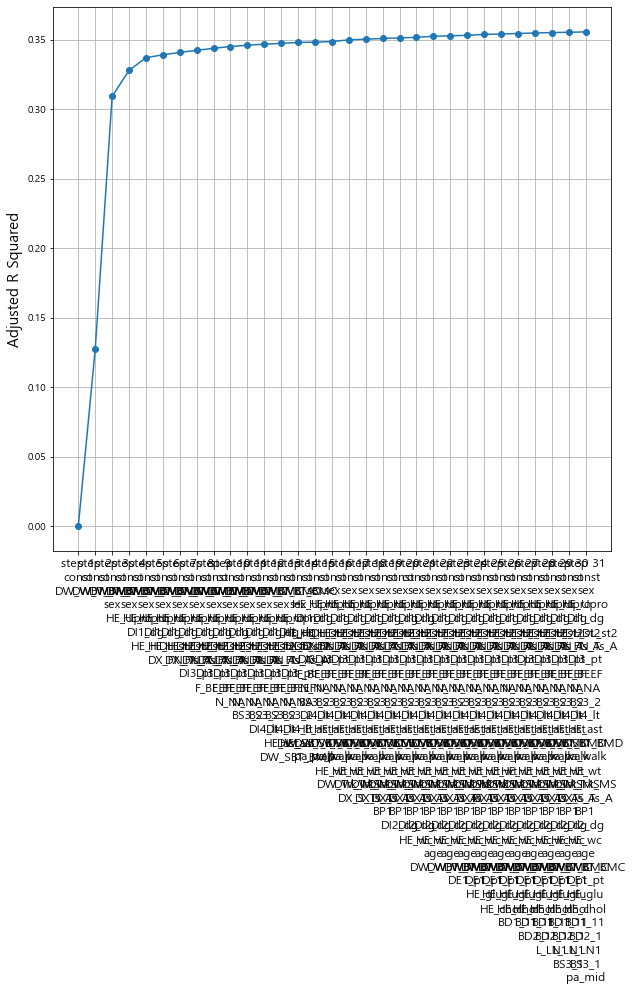

In [25]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

In [30]:
# train test split 
# using selected variables

feature_columns = df.columns.difference(["HE_crea"]) # Target column 빼기
feature_columns = selected_variables

X = df[feature_columns]
y = df.HE_crea

train_x, test_x, train_y, test_y = train_test_split(X,y, train_size = 0.7, test_size = 0.3)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(8125, 30) (3483, 30) (8125,) (3483,)


In [31]:
# X_col&지방량 OLS

model = sm.OLS(train_y,train_x)
fitted_model = model.fit()

fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                HE_crea   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     141.9
Date:                Mon, 18 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:34:27   Log-Likelihood:                 1860.6
No. Observations:                8125   AIC:                            -3661.
Df Residuals:                    8095   BIC:                            -3451.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2277      0.057     21.421      0.000       1.115       1.340
sex           -0.2254      0.008    -28.001      0.000      -0.241      -0.210
HE_Upro        0.1030      0.006     16.958      0.000       0.091       0.115
DI1_dg        -0.0062      0.001     -7.186      0.000      -0.008      -0.005
HE_HDL_st2    -0.0010      0.000     -4.511      0.000      -0.001      -0.001
DX_FN_Ts_A    -0.0149      0.003     -4.420      0.000      -0.021      -0.008
DI3_pt        -0.0085      0.002     -3.804      0.000      -0.013      -0.004
F_BEEF         0.0069      0.001      4.855      0.000       0.004       0.010
N_NA       -2.426e-06   6.87e-07     -3.532      0.000   -3.77e-06   -1.08e-06
BS3_2        2.79e-05   8.09e-06      3.447      0.001     1.2e-05    4.38e-05
DI4_lt         0.0394      0.014      2.767      0.006       0.011       0.067
HE_ast        -0.0006      0.000     -3.347      0.001      -0.001      -0.000
DW_SBT_BMD     0.1937      0.050      3.853      0.000       0.095       0.292
pa_walk       -0.0101      0.004     -2.297      0.022      -0.019      -0.001
HE_wt          0.0055      0.001      5.280      0.000       0.003       0.008
DW_Trk_MS  -5.712e-06   1.77e-06     -3.219      0.001   -9.19e-06   -2.23e-06
DX_S_Ts_A      0.0088      0.003      3.054      0.002       0.003       0.014
BP1            0.0087      0.003      2.973      0.003       0.003       0.014
DI2_dg        -0.0018      0.001     -1.689      0.091      -0.004       0.000
HE_wc         -0.0018      0.000     -3.634      0.000      -0.003      -0.001
age            0.0006      0.000      2.693      0.007       0.000       0.001
DW_WBT_BMC  -4.18e-05   1.61e-05     -2.600      0.009   -7.33e-05   -1.03e-05
DE1_pt        -0.0059      0.001     -4.399      0.000      -0.009      -0.003
HE_glu        -0.0006      0.000     -4.829      0.000      -0.001      -0.000
HE_chol        0.0001   6.48e-05      1.997      0.046    2.35e-06       0.000
BD1_11        -0.0030      0.001     -3.020      0.003      -0.005      -0.001
BD2_1          0.0023      0.001      2.836      0.005       0.001       0.004
L_LN1          0.0163      0.008      1.962      0.050     1.3e-05       0.033
BS3_1         -0.0024      0.001     -2.243      0.025      -0.004      -0.000
pa_mid        -0.0145      0.006     -2.323      0.020      -0.027      -0.002
==============================================================================
Omnibus:                    15475.732   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         54428668.279
Skew:                          14.414   Prob(JB):                         0.00
Kurtosis:                     402.929   Cond. No.                     9.77e+05
==============================================================================

N

In [32]:
test_col = ['const', 'DW_WBT_FT', 'sex', 'age', 'HE_wc', 'HE_wt']

In [33]:
# train test split 
# using test variables

feature_columns = df.columns.difference(["HE_crea"]) # Target column 빼기
feature_columns = test_col

X = df[test_col]
y = df.HE_crea

train_x, test_x, train_y, test_y = train_test_split(X,y, train_size = 0.7, test_size = 0.3)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(8125, 6) (3483, 6) (8125,) (3483,)


In [34]:
# X_col&지방량 OLS

model = sm.OLS(train_y,train_x)
fitted_model = model.fit()

fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                HE_crea   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     669.1
Date:                Mon, 18 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:38:51   Log-Likelihood:                 1694.5
No. Observations:                8125   AIC:                            -3377.
Df Residuals:                    8119   BIC:                            -3335.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1065      0.035     31.960      0.000       1.039       1.174
DW_WBT_FT   6.781e-07   8.18e-07      0.829      0.407   -9.26e-07    2.28e-06
sex           -0.2369      0.009    -26.588      0.000      -0.254      -0.219
age            0.0012      0.000      6.732      0.000       0.001       0.002
HE_wc         -0.0017      0.000     -3.523      0.000      -0.003      -0.001
HE_wt          0.0024      0.001      4.552      0.000       0.001       0.003
==============================================================================
Omnibus:                    16126.326   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         68541603.657
Skew:                          15.796   Prob(JB):                         0.00
Kurtosis:                     451.847   Cond. No.                     2.98e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

------------------------------------------------------------------

### 포기 !!